In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [8]:
y=df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [9]:
x = df.drop(['class'],axis=1)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [10]:
y.unique()

array(['p', 'e'], dtype=object)

In [11]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
# Encoding Categorical Data
labelencoder_x=LabelEncoder()
for col in x.columns:
    x[col] = labelencoder_x.fit_transform(x[col])

labelencoder_y=LabelEncoder()
y=labelencoder_y.fit_transform(y)

In [13]:
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [15]:
# how many categories/labels in each variable

for col in df.columns:
    print(col, ': ', len(df[col].unique()), 'labels')

class :  2 labels
cap-shape :  6 labels
cap-surface :  4 labels
cap-color :  10 labels
bruises :  2 labels
odor :  9 labels
gill-attachment :  2 labels
gill-spacing :  2 labels
gill-size :  2 labels
gill-color :  12 labels
stalk-shape :  2 labels
stalk-root :  5 labels
stalk-surface-above-ring :  4 labels
stalk-surface-below-ring :  4 labels
stalk-color-above-ring :  9 labels
stalk-color-below-ring :  9 labels
veil-type :  1 labels
veil-color :  4 labels
ring-number :  3 labels
ring-type :  5 labels
spore-print-color :  9 labels
population :  6 labels
habitat :  7 labels


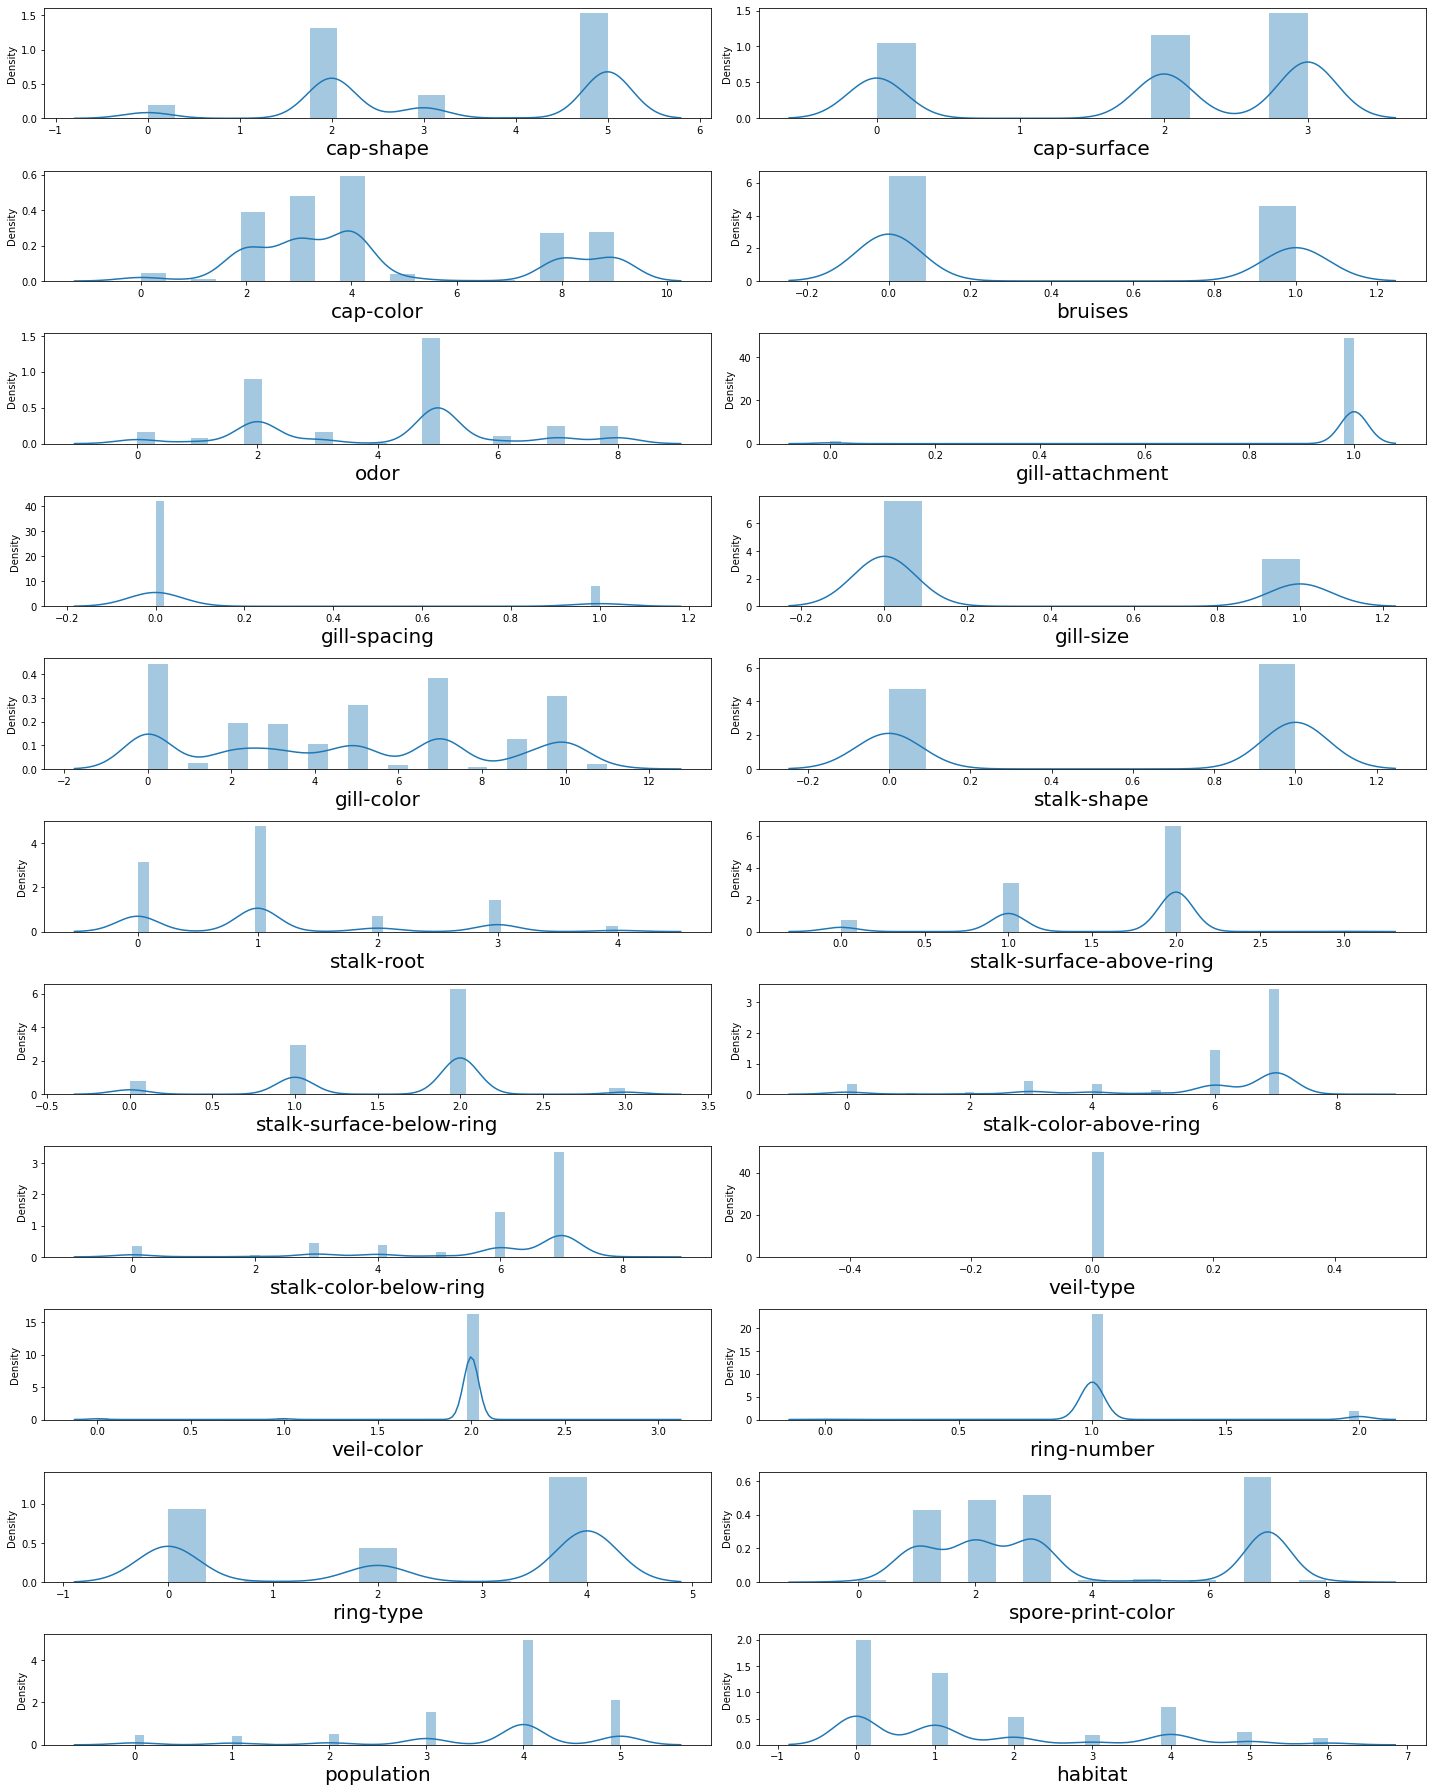

In [16]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=22:
        ax = plt.subplot(11,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
        

In [17]:
# since viel-type is having only one unique value, we delete that
x['veil-type'].unique()

array([0])

In [18]:
x = x.drop(["veil-type"],axis=1)

In [19]:
# separating train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [20]:
# printing shapes of all dataset-
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 21)
(6093,)
(2031, 21)
(2031,)


In [26]:
#using Logistic Regression to build the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)

In [27]:
print("Logistic Regression score :", lr.score(x_test,y_test))

Logistic Regression score : 0.9497784342688331


In [28]:
print("Logistic Regression report: \n\n", classification_report(y_test, lr_predict))

Logistic Regression report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1040
           1       0.95      0.95      0.95       991

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



In [29]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

print(lr_conf_matrix)
print(lr_accuracy)

[[989  51]
 [ 51 940]]
0.9497784342688331


In [30]:
# roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_predict_prob[:,1] )

In [31]:
#auc score
from sklearn.metrics import auc
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.982119847861523


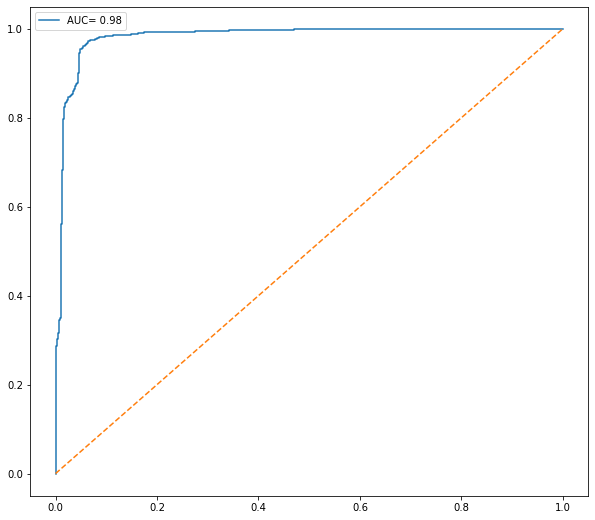

In [32]:
#plotting ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_predict =dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [35]:
print("Decision Tree score :", dt.score(x_test,y_test))

Decision Tree score : 1.0


In [36]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, dt_predict))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [37]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy = accuracy_score(y_test, dt_predict)

print(dt_conf_matrix)
print(dt_accuracy)

[[1040    0]
 [   0  991]]
1.0


In [38]:
# roc_curve
fpr, tpr, thresholds = roc_curve(y_test,dt_predict_prob[:,1] )

In [39]:
# auc score
lr_auc = auc(fpr, tpr)
print(lr_auc)

1.0


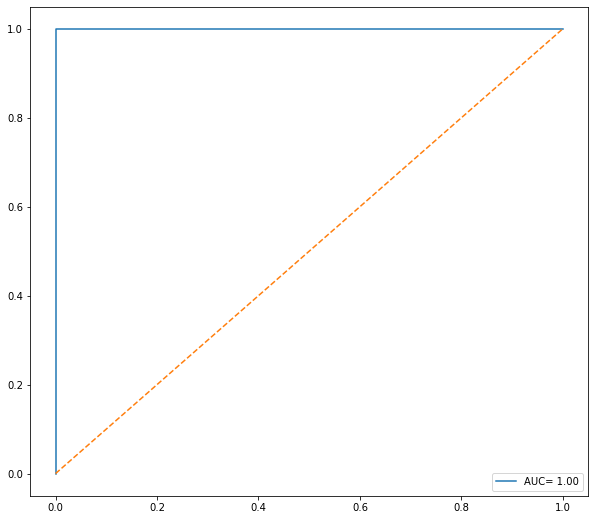

In [40]:
#plotting ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [41]:
grid_param={'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [42]:
from sklearn.model_selection import GridSearchCV


In [43]:
grid_search= GridSearchCV(dt,param_grid=grid_param,cv=5)

In [44]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [45]:
best_param=grid_search.best_params_
print(best_param)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}


In [46]:
dtn= DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=1,min_samples_split=2,splitter='best')

In [47]:
dtn.fit(x_train,y_train)
dtn.score(x_test,y_test)

1.0

__The Logistic Regression Model is performing good so we are using that for prediction__

In [48]:
import pickle
# Writing different model files to file
with open( 'finalized_model.sav', 'wb') as f:
    pickle.dump(lr,f)